<a href="https://colab.research.google.com/github/qazalmehrban/Medical-Segmentation/blob/ghazal/Copy_of_kaiser2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from scipy import signal
from scipy.fftpack import fft, fftshift
import matplotlib.pyplot as plt
import numpy as np

[9.643274665532871e-16, 0.010649981367835385, 0.010649981367835385, 0.04262431607687156, 0.04262431607687156, 0.09599645675365129, 0.09599645675365129, 0.1708897678134802, 0.1708897678134802, 0.2674789665372919, 0.2674789665372919, 0.3859921938576216, 0.3859921938576216, 0.5267137711111004, 0.5267137711111004, 0.6899877195857819, 0.6899877195857819, 0.8762221440861291, 0.8762221440861291, 1.085894611365128, 1.085894611365128, 1.3195586909675496, 1.3195586909675496, 1.5778518722328365, 1.5778518722328365, 1.861505130224364, 1.861505130224364, 2.171354489719452, 2.171354489719452, 2.508355036424446, 2.508355036424446, 2.8735979571764836, 2.8735979571764836, 3.2683313687902134, 3.2683313687902134, 3.693985936869887, 3.693985936869887, 4.152206618517699, 4.152206618517699, 4.644892327094689, 4.644892327094689, 5.174245974930423, 5.174245974930423, 5.742838297147093, 5.742838297147093, 6.353690248597235, 6.353690248597235, 7.010380842570026, 7.010380842570026, 7.717190473395217, 7.717190473

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.


Text(0.5, 0, 'Normalized frequency [cycles per sample]')

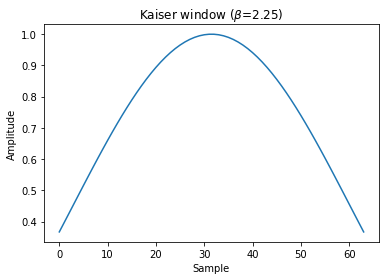

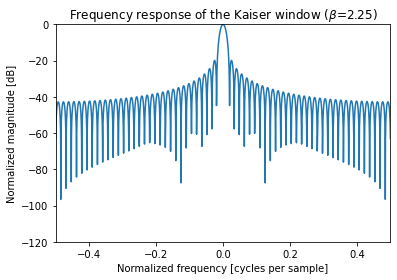

In [29]:
window = signal.kaiser(64, beta=2.25)
plt.plot(window)
plt.title(r"Kaiser window ($\beta$=2.25)")
plt.ylabel("Amplitude")
plt.xlabel("Sample")

plt.figure()
A = fft(window, 2048) / (len(window)/2.0)
freq = np.linspace(-0.5, 0.5, len(A))
response = 20 * np.log10(np.abs(fftshift(A / abs(A).max())))
print(response)
plt.plot(freq, response)
plt.axis([-0.5, 0.5, -120, 0])
plt.title(r"Frequency response of the Kaiser window ($\beta$=2.25)")
plt.ylabel("Normalized magnitude [dB]")
plt.xlabel("Normalized frequency [cycles per sample]")

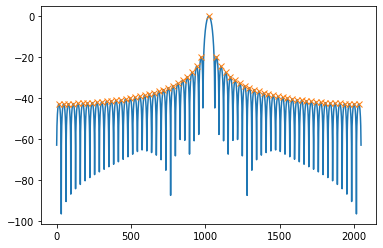

array([-4.27874371e+01, -4.27874371e+01, -4.27664954e+01, -4.27664954e+01,
       -4.27245108e+01, -4.27245108e+01, -4.26612788e+01, -4.26612788e+01,
       -4.25764875e+01, -4.25764875e+01, -4.24697119e+01, -4.24697119e+01,
       -4.23404045e+01, -4.23404045e+01, -4.21878840e+01, -4.21878840e+01,
       -4.20113204e+01, -4.20113204e+01, -4.18097156e+01, -4.18097156e+01,
       -4.15818792e+01, -4.15818792e+01, -4.13263976e+01, -4.13263976e+01,
       -4.10415950e+01, -4.10415950e+01, -4.07254829e+01, -4.07254829e+01,
       -4.03756961e+01, -4.03756961e+01, -3.99894083e+01, -3.99894083e+01,
       -3.95632219e+01, -3.95632219e+01, -3.90930198e+01, -3.90930198e+01,
       -3.85737648e+01, -3.85737648e+01, -3.79992213e+01, -3.79992213e+01,
       -3.73615613e+01, -3.73615613e+01, -3.66507910e+01, -3.66507910e+01,
       -3.58516341e+01, -3.58516341e+01, -3.49452164e+01, -3.49452164e+01,
       -3.39098849e+01, -3.39098849e+01, -3.27108275e+01, -3.27108275e+01,
       -3.12957773e+01, -

In [31]:
from scipy.signal import find_peaks
peaks, _ = find_peaks(response)

plt.plot(response)
plt.plot(peaks, response[peaks], "x")
np.sort(response[find_peaks(response)[0]])

[        -inf -76.93746796 -58.32876672 ... -61.96693042 -58.32876672
 -76.93746796]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10


Text(0.5, 0, 'Normalized frequency [cycles per sample]')

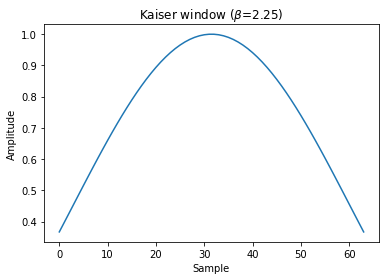

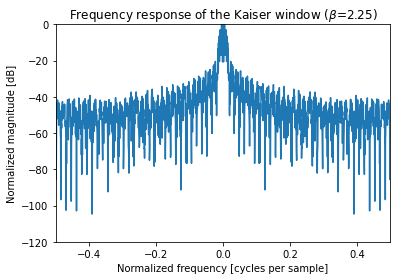

In [9]:
window = signal.kaiser(64, beta=2.25)
plt.plot(window)
plt.title(r"Kaiser window ($\beta$=2.25)")
plt.ylabel("Amplitude")
plt.xlabel("Sample")

plt.figure()
A = fft(window, 2048) / (len(window)/2.0)
freq = np.linspace(-0.5, 0.5, len(A))
mean = 0
std = 1 
num_samples = len(A)
noise = np.random.normal(mean, std, size=num_samples)
ffreq = fft(noise) / (len(noise)/2)
s_k = ffreq*A
k= fftshift(s_k)
response0 = 20 * np.log10(np.abs(fftshift(s_k / abs(s_k).max())))
print(response0)
plt.plot(freq, response0)
plt.axis([-0.5, 0.5, -120, 0])
plt.title(r"Frequency response of the Kaiser window ($\beta$=2.25)")
plt.ylabel("Normalized magnitude [dB]")
plt.xlabel("Normalized frequency [cycles per sample]")

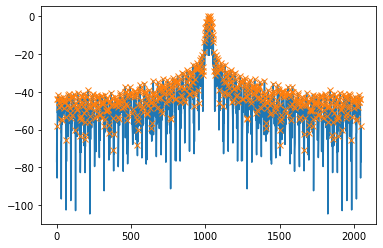

array([-70.96828771, -70.96828771, -68.22825778, -68.22825778,
       -65.32991651, -65.32991651, -65.05508835, -65.05508835,
       -63.20019537, -63.20019537, -62.88066323, -62.88066323,
       -62.48191721, -62.48191721, -61.68154139, -61.68154139,
       -60.44608843, -60.44608843, -60.15371814, -60.15371814,
       -59.27269579, -59.27269579, -58.32876672, -58.32876672,
       -57.93504895, -57.93504895, -57.68919135, -57.68919135,
       -56.70209603, -56.70209603, -56.24059294, -56.24059294,
       -55.86737542, -55.86737542, -55.21523344, -55.21523344,
       -55.00536153, -55.00536153, -54.90502502, -54.90502502,
       -54.73047351, -54.73047351, -54.59736261, -54.59736261,
       -54.47465991, -54.47465991, -54.36164603, -54.36164603,
       -54.2870459 , -54.2870459 , -54.19164817, -54.19164817,
       -54.10076794, -54.10076794, -54.083606  , -54.083606  ,
       -53.83615351, -53.83615351, -53.79435542, -53.79435542,
       -53.76196837, -53.76196837, -53.70344318, -53.70

In [30]:
from scipy.signal import find_peaks
peaks, _ = find_peaks(response0)

plt.plot(response0)
plt.plot(peaks, response0[peaks], "x")
plt.show()
np.sort(response0[find_peaks(response0)[0]])

[-35.6010463  -41.0912811  -42.08972489 ... -34.7949849  -42.08972489
 -41.0912811 ]


Text(0.5, 0, 'Normalized frequency [cycles per sample]')

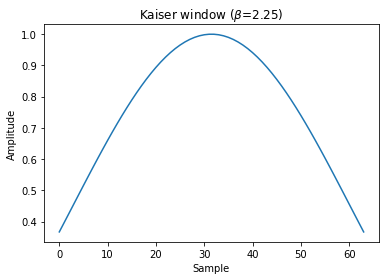

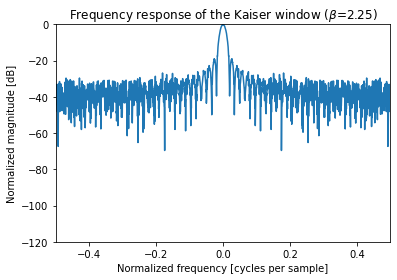

In [27]:
from scipy import signal
from scipy.fftpack import fft, fftshift
import matplotlib.pyplot as plt
import numpy as np

window = signal.kaiser(64, beta=2.25)
plt.plot(window)
plt.title(r"Kaiser window ($\beta$=2.25)")
plt.ylabel("Amplitude")
plt.xlabel("Sample")
beta=2.25
plt.figure()
A = fft(window, 2048) / (len(window)/2.0)
freq = np.linspace(-0.5, 0.5, len(A))
mean = 0
std = 1 
num_samples = len(A)
noise = np.random.normal(mean, std, size=num_samples)
ffreq = fft(noise) / (len(noise)/2)
s_f = ffreq - beta*(ffreq- A*(ffreq / abs(ffreq)))
s = fftshift(s_f)
response1 = 20 * np.log10(np.abs(fftshift(s_f / abs(s_f).max())))
print(response1)
plt.plot(freq, response1)
plt.axis([-0.5, 0.5, -120, 0])
plt.title(r"Frequency response of the Kaiser window ($\beta$=2.25)")
plt.ylabel("Normalized magnitude [dB]")
plt.xlabel("Normalized frequency [cycles per sample]")

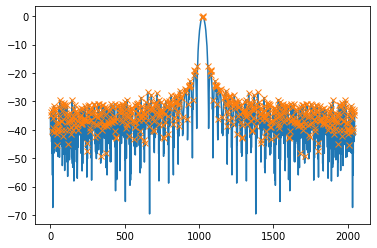

array([-49.06043422, -49.06043422, -48.06324779, -48.06324779,
       -47.56842073, -47.56842073, -45.40939887, -45.40939887,
       -44.96916032, -44.96916032, -44.67916556, -44.67916556,
       -44.61958675, -44.61958675, -43.60139222, -43.60139222,
       -43.31613229, -43.31613229, -42.91246595, -42.91246595,
       -42.76227329, -42.76227329, -42.4970372 , -42.4970372 ,
       -42.44205551, -42.44205551, -42.43730766, -42.43730766,
       -42.37072581, -42.37072581, -42.2451088 , -42.2451088 ,
       -42.22932431, -42.22932431, -41.83661374, -41.83661374,
       -41.60467182, -41.60467182, -41.46238941, -41.46238941,
       -41.28629406, -41.28629406, -40.8038205 , -40.8038205 ,
       -40.5747418 , -40.5747418 , -40.49503567, -40.49503567,
       -40.40613203, -40.40613203, -40.3829499 , -40.3829499 ,
       -40.35909714, -40.35909714, -40.33599849, -40.33599849,
       -40.17511043, -40.17511043, -40.15686207, -40.15686207,
       -40.00275233, -40.00275233, -39.9574628 , -39.95

In [28]:
from scipy.signal import find_peaks
peaks, _ = find_peaks(response1)

plt.plot(response1)
plt.plot(peaks, response1[peaks], "x")
plt.show()
np.sort(response1[find_peaks(response1)[0]])

[-0.0, 23.420040968280226, 23.420040968280226, 23.488135473882046, 23.488135473882046, 24.012418647901917, 24.012418647901917, 25.21214055824457, 25.21214055824457, 25.23881982196837, 25.23881982196837, 25.351014247670673, 25.351014247670673, 25.93800050893249, 25.93800050893249, 25.971478037832483, 25.971478037832483, 26.003761203303778, 26.003761203303778, 26.394050650937565, 26.394050650937565, 26.610895412524854, 26.610895412524854, 26.632852159388946, 26.632852159388946, 26.70413938156818, 26.70413938156818, 26.7237390336078, 26.7237390336078, 26.903042912954795, 26.903042912954795, 27.05113343865606, 27.05113343865606, 27.104518833512905, 27.104518833512905, 27.121232156517713, 27.121232156517713, 27.195758077885436, 27.195758077885436, 27.414757947095673, 27.414757947095673, 27.582724023663125, 27.582724023663125, 27.71928421341656, 27.71928421341656, 27.763925733983477, 27.763925733983477, 27.79864416585965, 27.79864416585965, 27.840456198106214, 27.840456198106214, 27.96261303

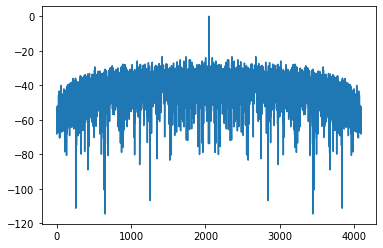

In [17]:
sig_noise1 = noise + noise
corr1 =  20 * np.log10(np.abs(signal.correlate(sig_noise1, noise) / abs(signal.correlate(sig_noise1, noise).max())))
print(sorted(-1*corr1))
plt.plot(corr1)

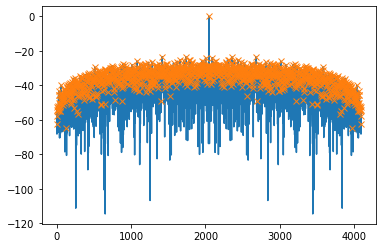

In [19]:
from scipy.signal import find_peaks
peaks, _ = find_peaks(corr1)

plt.plot(corr1)
plt.plot(peaks, corr1[peaks], "x")
plt.show()


In [20]:
np.sort(corr1[find_peaks(corr1)[0]])

array([-64.7247985 , -64.7247985 , -62.23740359, ..., -23.42004097,
       -23.42004097,   0.        ])

[-0.0, 23.40132950175503, 23.42337881275479, 23.48300296863872, 23.49454923486092, 24.013197080573782, 24.020024747934194, 25.19390000772054, 25.208102327775176, 25.217169960354447, 25.260345223317444, 25.349698938875026, 25.357490869702005, 25.94984973146817, 25.96325351267221, 25.979267433931664, 25.984816061885937, 26.00186259775318, 26.056642840939492, 26.410228715586715, 26.412043737201035, 26.62409344314122, 26.632559424674493, 26.63555272098659, 26.657623100261596, 26.682213388399816, 26.710070927063725, 26.724580522746336, 26.736247298866527, 26.89571455480759, 26.921435506303037, 27.060425493478007, 27.068415421800328, 27.121563506478296, 27.121589541808348, 27.141647338085455, 27.143771376734914, 27.16191330319143, 27.204743065954077, 27.414423579403415, 27.425368865355296, 27.58177638322, 27.609675962829158, 27.673934471833135, 27.72683523983296, 27.763470995515046, 27.76636485205738, 27.791391407116684, 27.793397004859433, 27.840658427808545, 27.85652691654456, 27.963018654

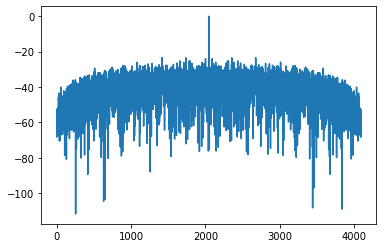

In [14]:
sig_noise2 = k + noise
corr2 =  20 * np.log10(np.abs(signal.correlate(sig_noise2, noise) / abs(signal.correlate(sig_noise2, noise).max())))
print(sorted(-1*corr2))
plt.plot(corr2)

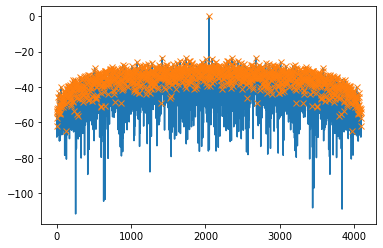

array([-64.75772049, -64.71556314, -62.23822081, ..., -23.42337881,
       -23.4013295 ,   0.        ])

In [21]:
from scipy.signal import find_peaks
peaks, _ = find_peaks(corr2)

plt.plot(corr2)
plt.plot(peaks, corr2[peaks], "x")
plt.show()
np.sort(corr2[find_peaks(corr2)[0]])


[-0.0, 22.317741284885454, 23.080069782409268, 23.080679244585877, 23.22118399517066, 23.9868542782146, 24.19902573088743, 24.291220427386776, 24.52900179318383, 24.5650541985623, 24.647406901848555, 24.65195720110224, 24.688203123415402, 24.889703739904046, 24.919608789252248, 25.02194609011033, 25.04996476977839, 25.05503293067292, 25.122626716803627, 25.219953204344012, 25.235887129927058, 25.310231794997353, 25.34467907102759, 25.36228502785637, 25.459857854516983, 25.461042625376923, 25.484462953637852, 25.526670688511857, 25.59407584768984, 25.668077969485324, 25.715905791363447, 25.813113469218614, 25.830660127910456, 25.874919031140774, 25.900882192989414, 25.90505400449302, 25.90833336566742, 25.949191725011946, 26.031682067712644, 26.048102834355692, 26.057433395153172, 26.15604227810634, 26.173197842686037, 26.20103835659764, 26.219813871066062, 26.224214395653075, 26.22903421772563, 26.244516535894725, 26.29708748806621, 26.303031979667175, 26.305361341001287, 26.3180599101

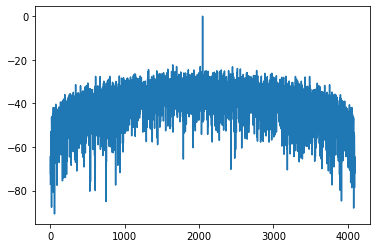

In [32]:
sig_noise = s + noise
corr =  20 * np.log10(np.abs(signal.correlate(sig_noise, noise) / abs(signal.correlate(sig_noise, noise).max())))
print(sorted(-1*corr))
plt.plot(corr)


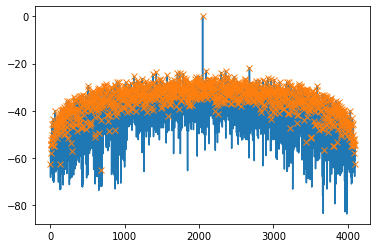

array([-6.48624729e+01, -6.26266661e+01, -6.24331453e+01, ...,
       -2.29714227e+01, -2.18178653e+01, -9.64327467e-16])

In [22]:
from scipy.signal import find_peaks
peaks, _ = find_peaks(corr)

plt.plot(corr)
plt.plot(peaks, corr[peaks], "x")
plt.show()
np.sort(corr[find_peaks(corr)[0]])

In [ ]:
akf1=xcorr(A);
akf2=xcorr(B);
A1=akf1;
A2=akf2;

akf=akf1+akf2;
akf=abs(akf);
m = max(akf);
akf=akf./m;
AKF=akf;
s=sum(AKF);
mm=max(AKF);
ISLakf=10*log10((s-mm)/m)
     
      subplot(2,1,2),plot(AKF)
      title  ( ' Resulting Pulse Compression')
      text (20,0.9,'main lobe power')
      text (2,0.2,'range sidelobes')
      
    
    [row,col]=max(AKF);
    maxi=AKF;
    maxi(row,col)=0;
    mm1=max(maxi);
   
    PSLakf=10*log10(mm1/m)
    MeritFactor=m/(s-mm)